In [7]:
import numpy as np
import torch
import torchvision
from torch.utils.data.dataset import Dataset
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt

In [ ]:
# importing module
from pandas import *
 
# reading CSV file
data = read_csv("merged.csv")
 
# converting column data to list
dir_x_list = data['dir_x'].tolist()
dir_y_list = data['dir_y'].tolist()
dir_z_list = data['dir_z'].tolist()
vel1_x_list = data['vel1_x'].tolist()
vel1_y_list = data['vel1_y'].tolist()
vel1_z_list = data['vel1_z'].tolist()
vel2_x_list = data['vel2_x'].tolist()
vel2_y_list = data['vel2_y'].tolist()
vel2_z_list = data['vel2_z'].tolist()
frc_x_list = data['frc_x'].tolist()
frc_y_list = data['frc_y'].tolist()
frc_z_list = data['frc_z'].tolist()
 


In [8]:
# ################## Part 1: load data and create batch ##################
# Generate data and shuffle
N_total = 40000
N_train = 30000

# convert data list into tensor
dir_x_ts = torch.FloatTensor(dir_x_list)
dir_y_ts = torch.FloatTensor(dir_y_list)
dir_z_ts = torch.FloatTensor(dir_z_list)

vel1_x_ts = torch.FloatTensor(vel1_x_list)
vel1_y_ts = torch.FloatTensor(vel1_y_list)
vel1_z_ts = torch.FloatTensor(vel1_z_list)

vel2_x_ts = torch.FloatTensor(vel2_x_list)
vel2_y_ts = torch.FloatTensor(vel2_y_list)
vel2_z_ts = torch.FloatTensor(vel2_z_list)

frc_x_ts = torch.FloatTensor(frc_x_list)
frc_y_ts = torch.FloatTensor(frc_y_list)
frc_z_ts = torch.FloatTensor(frc_z_list)

dir_x_ts_us = torch.unsqueeze(dir_x_ts,dim=1)
dir_y_ts_us = torch.unsqueeze(dir_y_ts,dim=1)
dir_z_ts_us = torch.unsqueeze(dir_z_ts,dim=1)

vel1_x_ts_us = torch.unsqueeze(vel1_x_ts,dim=1)
vel1_y_ts_us = torch.unsqueeze(vel1_y_ts,dim=1)
vel1_z_ts_us = torch.unsqueeze(vel1_z_ts,dim=1)

vel2_x_ts_us = torch.unsqueeze(vel2_x_ts,dim=1)
vel2_y_ts_us = torch.unsqueeze(vel2_y_ts,dim=1)
vel2_z_ts_us = torch.unsqueeze(vel2_z_ts,dim=1)

frc_x_ts_us = torch.unsqueeze(frc_x_ts,dim=1)
frc_y_ts_us = torch.unsqueeze(frc_y_ts,dim=1)
frc_z_ts_us = torch.unsqueeze(frc_z_ts,dim=1)


#x = torch.unsqueeze(torch.linspace(0, 1, N_total), dim=1)
#r = torch.randperm(N_total)
#x = x[r, :]
#y = 0.2 + 0.4 * torch.pow(x, 2) + 0.3 * x * torch.sin(15 * x) + 0.05 * torch.cos(50 * x)


In [9]:
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y1 = self.y[idx]
        x1 = self.x[idx]
        return (x1, y1)

trainset = CustomDataset(x[0:N_train, :], y[0:N_train, :])
testset = CustomDataset(x[N_train:N_total, :], y[N_train:N_total, :])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=50)
test_loader = torch.utils.data.DataLoader(testset, batch_size=50)

In [10]:
# ################## Part 2: Define Model and initialize ##################
# This part need to be changed to define a new model
model = nn.Sequential(nn.Linear(1, 1024, bias=True),
                      nn.ReLU(),
                      # nn.Linear(128, 64, bias=True),
                      # nn.ReLU(),
                      nn.Linear(1024, 1, bias=True)
                      )
print(model)


# ############## This part can be changed to different initialization
# Initialize as 0

# Initialize as uniform [-1, 1]
# for p in model.parameters():
#     p.data.uniform_(-1, 1)
def init_weights(m):
    if isinstance(m, nn.Linear):
        m.weight.data.uniform_(-1, 1)
        m.bias.data.uniform_(-1, 1)

# Initialize as normal
# m.bias.data.normal_(0, 1)
# m.weight.data.normal_(0, 0.03)

model.apply(init_weights)

Sequential(
  (0): Linear(in_features=1, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1, bias=True)
)


Sequential(
  (0): Linear(in_features=1, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1, bias=True)
)

In [11]:
# Initialize as normal
#
# ########################################################################

# ################## Part 3: Define Loss and optimizer ##################

# ######## This can be changed to different loss function, e.g., L2loss
# ######## and different optimization parameter，e.g. regularization, learning rata.
criterion = torch.nn.MSELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

Epoch: 000, train loss: 6.2081866, test loss: 6.2292633
Epoch: 001, train loss: 3.4381480, test loss: 3.4500246
Epoch: 002, train loss: 1.6520939, test loss: 1.6576262
Epoch: 003, train loss: 0.6641168, test loss: 0.6657228
Epoch: 004, train loss: 0.2138209, test loss: 0.2133635
Epoch: 005, train loss: 0.0555182, test loss: 0.0541032
Epoch: 006, train loss: 0.0184993, test loss: 0.0166960
Epoch: 007, train loss: 0.0156620, test loss: 0.0137326
Epoch: 008, train loss: 0.0166638, test loss: 0.0147169
Epoch: 009, train loss: 0.0163136, test loss: 0.0143917
Epoch: 010, train loss: 0.0155754, test loss: 0.0136917
Epoch: 011, train loss: 0.0151522, test loss: 0.0133049
Epoch: 012, train loss: 0.0149913, test loss: 0.0131731
Epoch: 013, train loss: 0.0149063, test loss: 0.0131106
Epoch: 014, train loss: 0.0148218, test loss: 0.0130439
Epoch: 015, train loss: 0.0147329, test loss: 0.0129712
Epoch: 016, train loss: 0.0146456, test loss: 0.0128998
Epoch: 017, train loss: 0.0145598, test loss: 0.

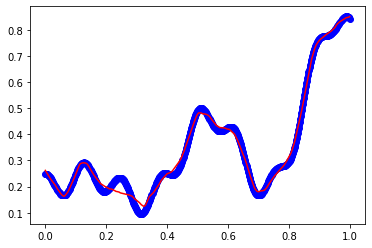

In [12]:
# ################## Part 4: Optimization ##################
def train_NN():
    model.train()
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss


def test_NN(loader):
    model.eval()
    loss = 0
    for images, labels in loader:
        images = images.view(images.shape[0], -1)
        out = model(images)
        loss += criterion(out, labels)
    loss = loss / len(loader)
    return loss


N_epoch = 500
train_loss = np.zeros((N_epoch, 1))
test_loss = np.zeros((N_epoch, 1))
for epoch in range(N_epoch):
    loss1 = train_NN()
    train_loss[epoch, 0] = test_NN(train_loader)
    test_loss[epoch, 0] = test_NN(test_loader)
    print(
        f'Epoch: {epoch:03d}, train loss: {train_loss[epoch, 0]:.7f}, test loss: {test_loss[epoch, 0]:.7f}')

x_test = torch.unsqueeze(torch.linspace(0, 1, 1999), dim=1)
y_test = model(x_test)

plt.plot(x[0:N_total], y[0:N_total], 'bo')
plt.plot(x_test, y_test.detach().numpy(), 'r')
plt.show()